## Laboratorio 3
### EL5206-2 Laboratorio de Inteligencia Computacional y Robótica
**Profesor:** Claudio Pérez.<br>
**Auxiliar:** Juan Pérez<br>
**Estudiantes:** Elisa Parga, Simon Repolt.

In [ ]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import IPython
import glob

##**Actividad 1: Detección de movimiento con diferencia de frames y modelo de fondo**

### Parte #1: Implementación de detector por diferencia de cuadros
Se implementa un detector de movimiento por diferencia de cuadros y se aplica sobre la secuencia de imágenes entregada: seq1, seq2 y seq3.

In [ ]:
def get_image_diff(path, lower_limit, upper_limit):
  img_list = sorted(glob.glob(path))
  seq_diff = []
  for i in range(lower_limit, upper_limit):
    img_1 = cv2.imread(img_list[i], cv2.IMREAD_GRAYSCALE).astype(np.float64)
    img_2 = cv2.imread(img_list[i+1], cv2.IMREAD_GRAYSCALE).astype(np.float64)
    dif = cv2.absdiff(img_1, img_2)
    seq_diff.append(dif)
  return np.array(seq_diff)

def evaluate_difference(seq_diff, th=17):
  bin_dif_seq = []
  for index in range(len(seq_diff)):
    diff_img = seq_diff[index]
    m, n = diff_img.shape
    bin_diff_img = np.zeros((m,n))
    for i in range(m):
      for j in range(n):
        if diff_img[i][j] > th:
          bin_diff_img[i][j] = 1
    bin_dif_seq.append(bin_diff_img)
  return np.array(bin_dif_seq)

## **Secuencia 1**: 

Podemos observar el movimiento de un pájaro que se cruza por la cámara. Notamos claramente el movimiento de las alas en las dos imágenes.

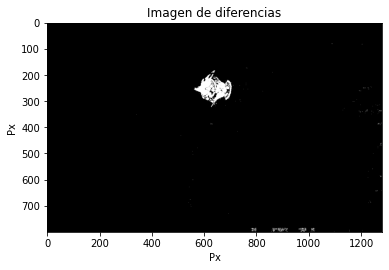

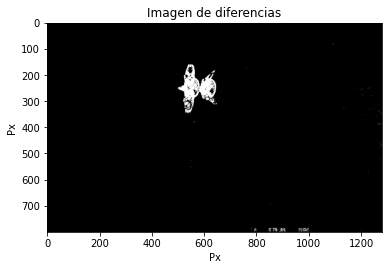

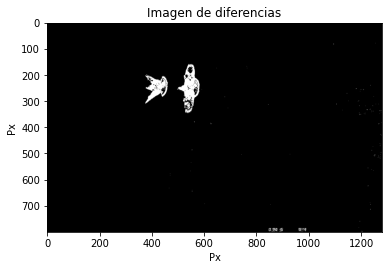

In [ ]:
path_1 = "/content/seq1/*.jpg"    
seq_1_dif = get_image_diff(path_1, 12, 15)
bin_seq_1 = evaluate_difference(seq_1_dif)
for img in bin_seq_1:
    plt.imshow(img, cmap="gray")
    plt.xlabel("Px")
    plt.ylabel("Px")
    plt.title("Imagen de diferencias")
    plt.show()

## **Secuencia 2**: 

Podemos observar el movimiento de una persona que se mueve en bicicleta.

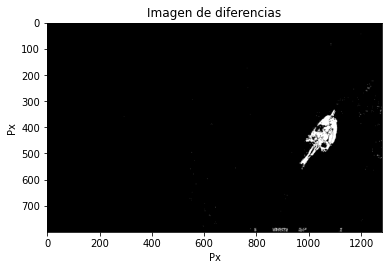

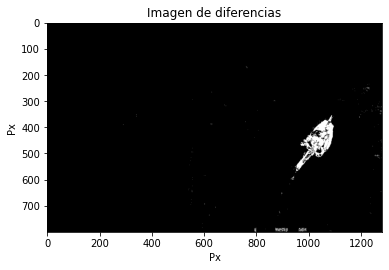

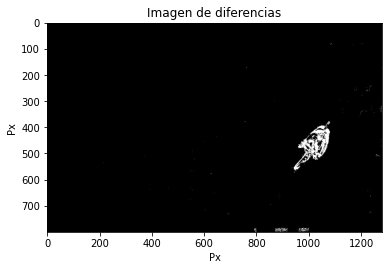

In [ ]:
path_2 = "/content/seq2/*.jpg"
seq_2_dif = get_image_diff(path_2, 72, 75)
bin_seq_2 = evaluate_difference(seq_2_dif)
for img in bin_seq_2:
    plt.imshow(img, cmap="gray")
    plt.xlabel("Px")
    plt.ylabel("Px")
    plt.title("Imagen de diferencias")
    plt.show()

## **Secuencia 3**: 

Podemos observar el movimiento de una niña que corre bajo la cámara.

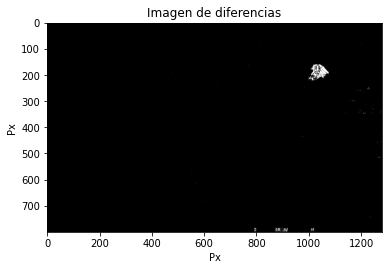

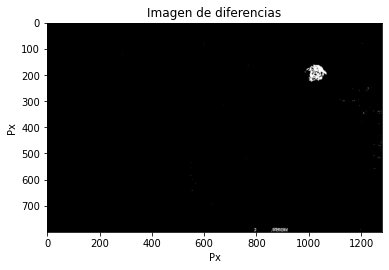

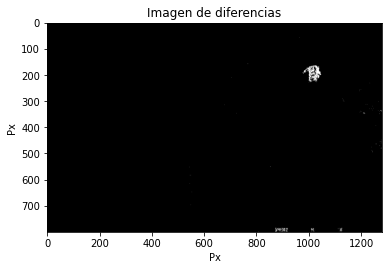

In [ ]:
path_3 = "/content/seq3/*.jpg"
seq_3_dif = get_image_diff(path_3, 72, 75)
bin_seq_3 = evaluate_difference(seq_3_dif)
for img in bin_seq_3:
    plt.imshow(img, cmap="gray")
    plt.xlabel("Px")
    plt.ylabel("Px")
    plt.title("Imagen de diferencias")
    plt.show()

### Parte #2: Averaging background
En esta parte se genera un modelo de fondo de dos matrices utilizando la secuencia de imágenes de la carpeta "fondo", calculando el promedio de los cuadros y la desviación estándar

In [ ]:
path_bg = "/content/fondos/*.jpg"
fondos = sorted(glob.glob(path_bg))

def get_mean_std_bg(list_img_bg):
  bg_imgs = []
  for img in list_img_bg:
    imagen = cv2.imread(img, cv2.IMREAD_GRAYSCALE).astype(np.float64)
    bg_imgs.append(imagen)
  bg_imgs = np.array(bg_imgs)
  return np.mean(bg_imgs, axis=0), np.std(bg_imgs, axis=0)

matrix_mean, matrix_std = get_mean_std_bg(fondos)

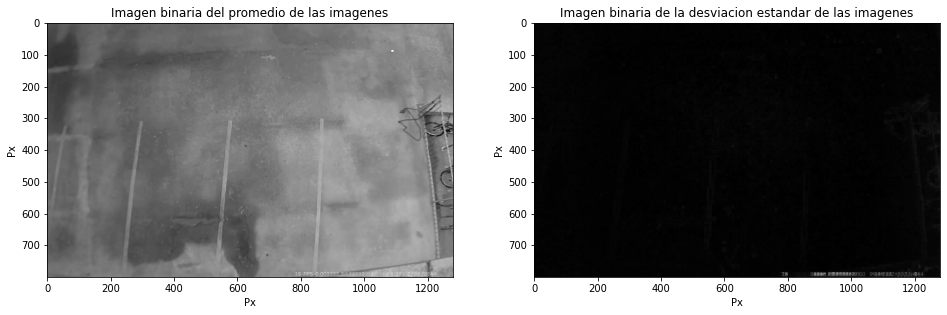

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(matrix_mean, cmap="gray")
plt.xlabel("Px")
plt.ylabel("Px")
plt.title("Imagen binaria del promedio de las imagenes")

plt.subplot(1,2,2)
plt.imshow(matrix_std.astype(np.uint8), cmap="gray")
plt.xlabel("Px")
plt.ylabel("Px")
plt.title("Imagen binaria de la desviacion estandar de las imagenes")
plt.show()

En el promedio se puede observar la imagen que captura la camara constantemente, dado que en este caso no hay mayores movimientos, no se presentan variaciones y por ende no es alterada en gran medida. Dado que no hay mayores cambios en las imagenes de la carpeta 'fondo', se tiene una desviación estándar muy baja por cada uno de los pixeles que componen la imagen, dado que no hay mayor variabilidad entre frame y frame. La única zona donde se resalta una mayor variación es en la parte inferior donde cambian constantemente la información númerica que capta el video. Es por esto que la imagen es mayoritariamente negra.

Se define la función 'fondos', que toma un path hacia una secuencia de fotogramas con movimiento, un índice que indica la foto a evaluar y un umbral para calcular el promedio y desviación estándar de los fondos para posteriormente definir que un pixel es de movimiento si:

$$V_{p}< X - \alpha D \quad \text{o} \quad X + \alpha D < V_{p}$$

Donde $V_{p}$ es cada pixel, $X$ es el pixel correspondiente en el promedio, $\alpha$ es el umbral y $D$ es el pixel correspondiente en la matriz de desviación estándar.


In [ ]:
def fondos(path, i, alpha=13):
    img = sorted(glob.glob(path))
    imagen = cv2.imread(img[i], cv2.IMREAD_GRAYSCALE)
    # new_img = cv2.absdiff(imagen, matrix_mean.astype('uint8')) > alpha*matrix_std.astype('uint8')*255
    x,y = imagen.shape
    copy = np.zeros((x,y))
    for m in range(x):
        for n in range(y):
            if (imagen[m][n] > matrix_mean[m][n] + alpha*matrix_std[m][n]) or (imagen[m][n] < matrix_mean[m][n] - alpha*matrix_std[m][n]):
                copy[m][n] = 255
    return copy

A continuación se aplica "Averaging Background" a cada fotograma de las secuencias 1, 2 y 3, con un umbral de 13 y considerando las imágenes de fondo que están en los "fondos" entregados. 

## **Secuencia 1**: 

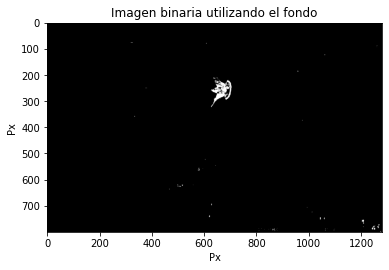

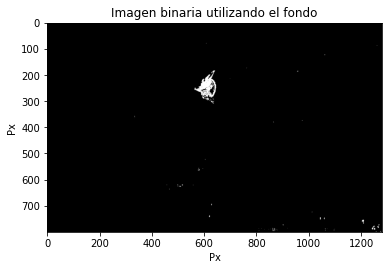

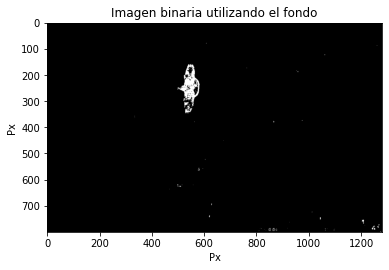

In [ ]:
for i in range(12,15):
    imagen=fondos(path_1, i)
    plt.imshow(imagen, cmap="gray")
    plt.xlabel("Px")
    plt.ylabel("Px")
    plt.title("Imagen binaria utilizando el fondo")
    plt.show()


## **Secuencia 2**: 

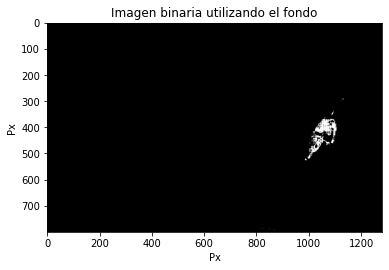

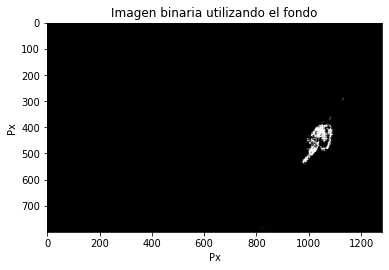

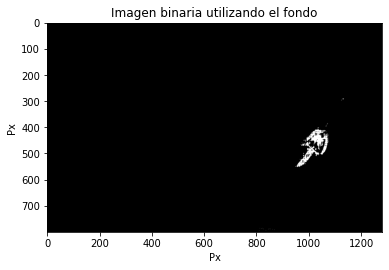

In [ ]:
for i in range(72,75):
    imagen=fondos(path_2, i, 50)
    plt.imshow(imagen, cmap="gray")
    plt.xlabel("Px")
    plt.ylabel("Px")
    plt.title("Imagen binaria utilizando el fondo")
    plt.show()

## **Secuencia 3**: 

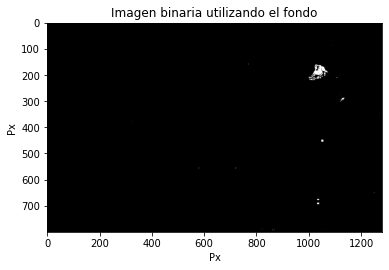

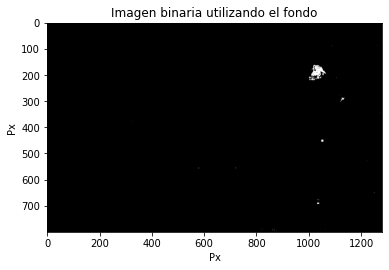

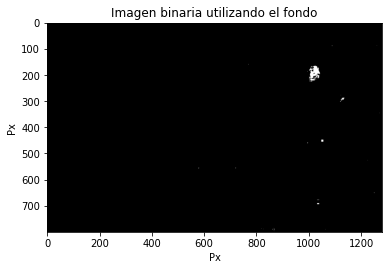

In [ ]:
for i in range(72,75):
    imagen=fondos(path_3, i, 30)
    plt.imshow(imagen, cmap="gray")
    plt.xlabel("Px")
    plt.ylabel("Px")
    plt.title("Imagen binaria utilizando el fondo")
    plt.show()

Aplicando esta técnica se observa que los resultados obtenidos permiten visualizar de forma más detallada los "cuerpos" en movimiento, a diferencia de aplicar diferencia de cuadros, donde se observa principalmente los bordes del objeto en movimiento. Es por esto también que los resultados son imágenes con más ruido.

### Parte #3: Histograma proyectado
En esta parte se utiliza la detección de movimiento obtenida en la parte anterior y se calcula el histograma proyectado por columnas y filas. Además, se encierra en una caja el blob de la detección de movimiento. 

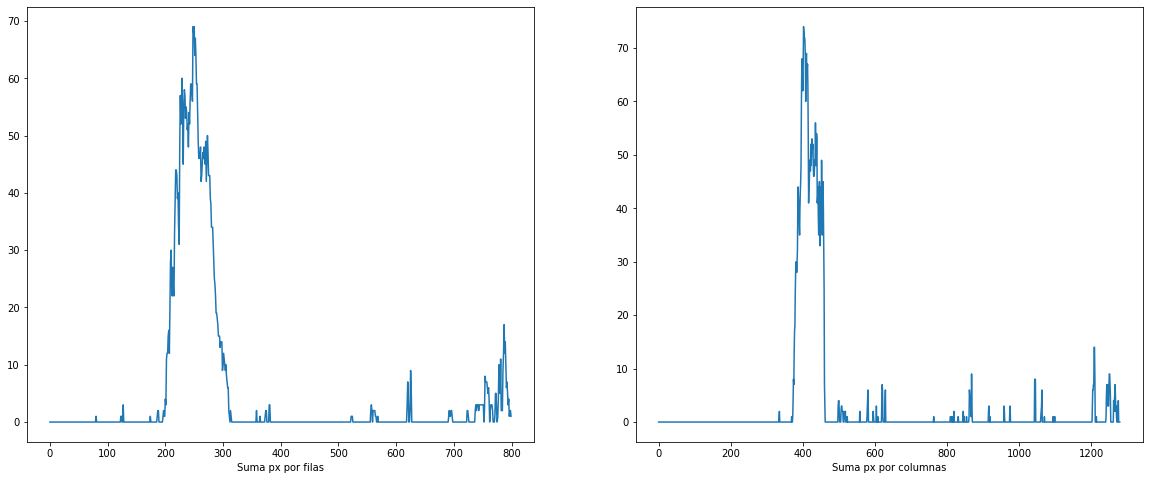

In [ ]:
imagen_pajaro = fondos(path_1,15)

def hist_hor(img):
    return np.count_nonzero(img, axis=0)

def hist_ver(img):
    return np.count_nonzero(img, axis=1)

histvert = hist_ver(imagen_pajaro)
histhor =  hist_hor(imagen_pajaro)
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(histvert)
plt.xlabel("Suma px por filas")
plt.subplot(1,2,2)
plt.plot(histhor)
plt.xlabel("Suma px por columnas")
plt.show()

Estos histogramas permiten establecer limites para dibujar las bounding boxes en cada fotograma con tal de determinar la ubicación del movimiento en las imágenes. 

Se debe establecer cuál es el mejor rectángulo que se aproxima al posicionamiento del movimiento en cada imagen, de tal forma que se encierre correctamente el cuerpo.

Para ello, se toma un umbral sobre el que se define el valor mínimo para considerar cada pixel, luego se generan pares ordenados consecutivos, tanto en vertical com horizontal para definir cual es el rectángulo de mayor área posible. Comparando el valor de cada una de las áreas se obtiene un rectángulo que posteriormente es dibujado sobre cada fotograma. 

In [ ]:
def get_bounding_box(hist_h, hist_v, th_h = 0, th_v = 0):
    #Se toman los pares de puntos mayores al umbral según el histograma horizontal
    bool_hor = hist_h > th_h
    intervH = np.where(np.diff(bool_hor))[0] + 1 #Puntos que son mayores al umbral
    if bool_hor[0]:
        intervH = np.r_[0,intervH]
    if bool_hor[-1]:
        intervH = np.r_[intervH, bool_hor.size]
    intervH = np.reshape(intervH, (-1, 2))
    
    #Se toman los pares de puntos mayores al umbral según el histograma vertical
    bool_ver = hist_v > th_v
    intervV = np.where(np.diff(bool_ver))[0] + 1 #Puntos que son mayores al umbral
    if bool_ver[0]:
        intervV = np.r_[0,intervV]
    if bool_ver[-1]:
        intervV = np.r_[intervV, bool_ver.size]
    intervV = np.reshape(intervV, (-1, 2))
    #Se busca cual es blob que abarca una mayor área considerando el umbral para
    #el valor mínimo.
    best_box = np.zeros((2,2), dtype=int)
    best_area = 0
    for intH in intervH:
        for intV in intervV:
            area = (intH[1]-intH[0])*(intV[1]-intV[0])
            if area > best_area:
                best_area = area
                best_box[0] = intH
                best_box[1] = intV
    return best_box

Luego, con la bounding box determinada, se dibuja en el fotograma respectivo utilizando la función drawBox. En ella se utiliza cv2.rectangle para dibujarlo directamente en el fotograma respectivo.

In [ ]:
def drawBox(img, box, color, box_size=1):
    img_2 = np.copy(img)
    # print(box)
    # box.astype(int)
    start = [box[0, 0], box[1, 0]] #punto de inicio
    end = [box[0, 1], box[1, 1]] #punto de fin
    cv2.rectangle(img_2, start, end, color, box_size) #Rectangulo segun histogramas
    return img_2

Se realiza una prueba para un fotograma de cada una de las secuencias, de tal forma que se dibuja el blob respectivo, en el que se destaca el movimiento del cuerpo.

## **Secuencia 1**: 

Text(0.5, 1.0, 'Imagen de pájaro detectado con bounding box')

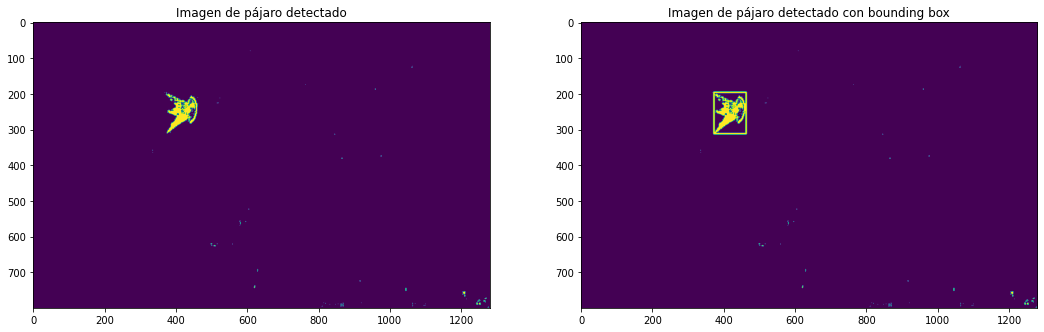

In [ ]:
bbox = get_bounding_box(histhor, histvert)
imagen_pajaro_bbox = drawBox(imagen_pajaro, bbox, 255, 3)
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
plt.imshow(imagen_pajaro)
plt.title("Imagen de pájaro detectado")

plt.subplot(1,2,2)
plt.imshow(imagen_pajaro_bbox)
plt.title("Imagen de pájaro detectado con bounding box")

## **Secuencia 2**: 

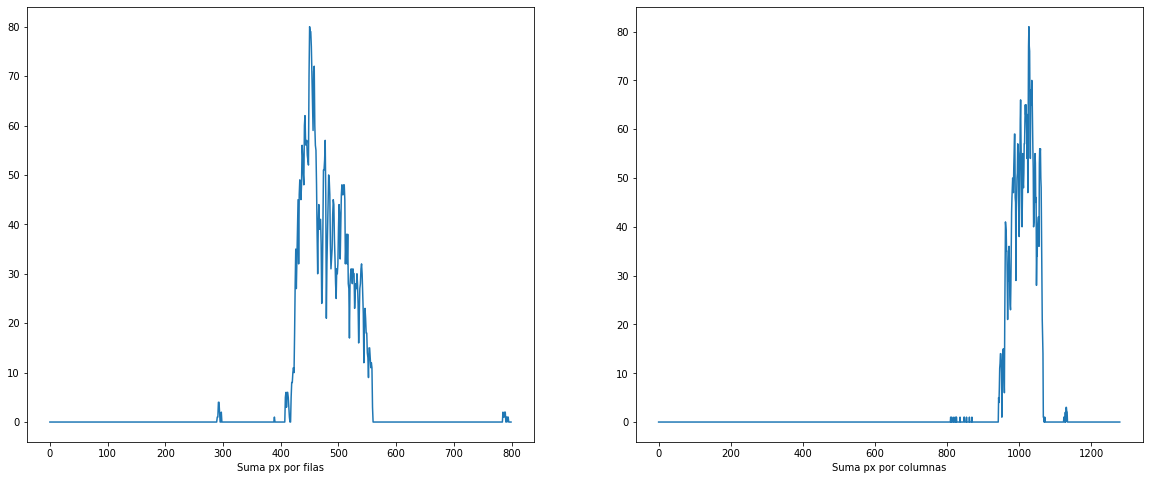

In [ ]:
imagen_bici = fondos(path_2,75, 50)

hist_v_bici = hist_ver(imagen_bici)
hist_h_bici =  hist_hor(imagen_bici)

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(hist_v_bici)
plt.xlabel("Suma px por filas")
plt.subplot(1,2,2)
plt.plot(hist_h_bici)
plt.xlabel("Suma px por columnas")
plt.show()

Text(0.5, 1.0, 'Imagen de bicicleta detectada con bounding box')

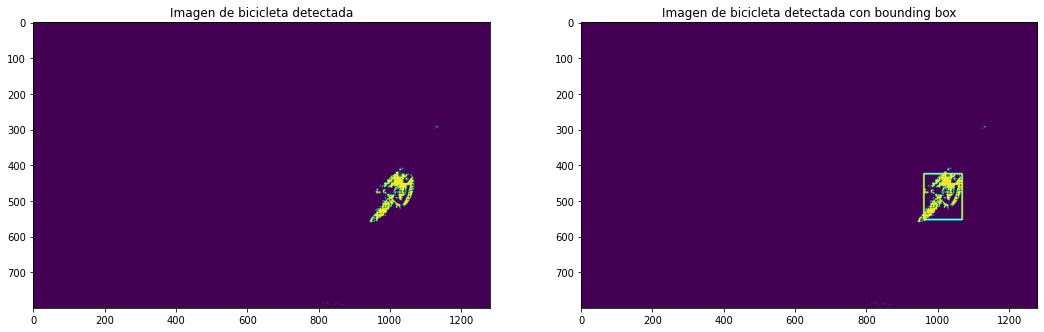

In [ ]:
bbox_bici = get_bounding_box(hist_h_bici, hist_v_bici, 10, 10)
imagen_bici_bbox = drawBox(imagen_bici, bbox_bici, 255, 3)
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
plt.imshow(imagen_bici)
plt.title("Imagen de bicicleta detectada")

plt.subplot(1,2,2)
plt.imshow(imagen_bici_bbox)
plt.title("Imagen de bicicleta detectada con bounding box")

## **Secuencia 3**: 

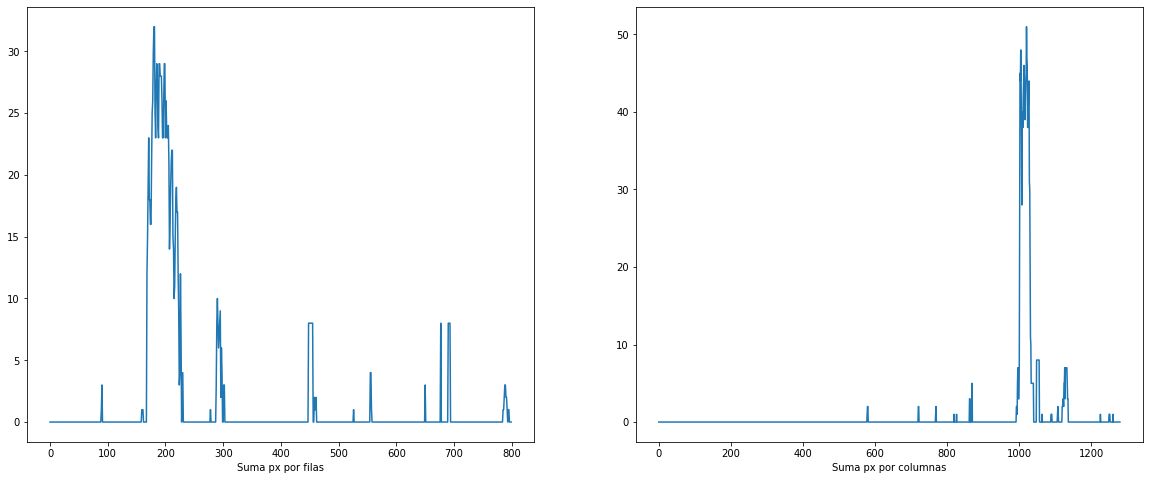

In [ ]:
imagen_seq3 = fondos(path_3, 75, 30)

hist_v_seq3 = hist_ver(imagen_seq3)
hist_h_seq3 =  hist_hor(imagen_seq3)

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(hist_v_seq3)
plt.xlabel("Suma px por filas")
plt.subplot(1,2,2)
plt.plot(hist_h_seq3)
plt.xlabel("Suma px por columnas")
plt.show()

Text(0.5, 1.0, 'Imagen de niña detectada con bounding box')

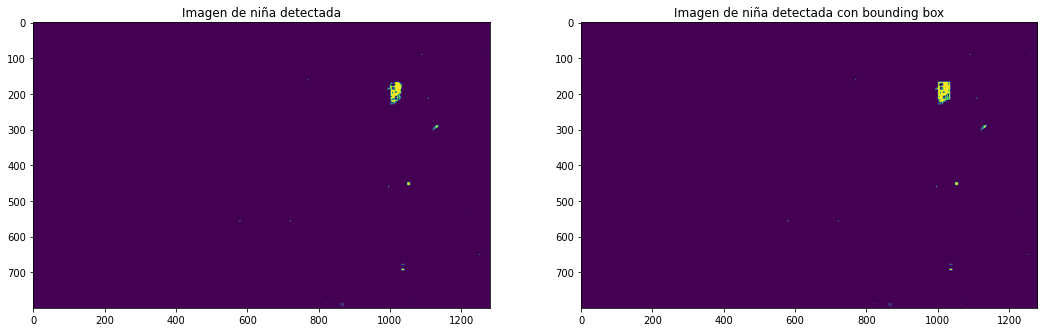

In [ ]:
bbox_seq3 = get_bounding_box(hist_h_seq3, hist_v_seq3, 10, 10)
imagen_seq3_bbox = drawBox(imagen_seq3, bbox_seq3, 255, 2)
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
plt.imshow(imagen_seq3)
plt.title("Imagen de niña detectada")

plt.subplot(1,2,2)
plt.imshow(imagen_seq3_bbox)
plt.title("Imagen de niña detectada con bounding box")

### Parte #4: Estimación blob
Usando la información de posición de la caja en el cuadro actual, y la de los cuadros anteriores, se estima la posición del objeto para el cuadro siguiente y se dibuja la caja estimada.

Se calcula la caja siguiente para el movimiento en cada fotograma utilizando las ecuaciones revisadas de forma teórica, para el ancho $w$, alto $h$ y centro de la caja $(x,y)$:

$$h(t)=h(t-1)+A\cdot(h(t-1)-h(t-2))$$
$$w(t)=w(t-1)+B\cdot(w(t-1)-w(t-2))$$
$$x(t)=w(t-1)+C\cdot(x(t-1)-x(t-2))$$
$$y(t)=y(t-1)+D\cdot(y(t-1)-y(t-2))$$

Para poder hacer uso de estas ecuaciones, se calculan los coeficientes $A, B, C, D$ más adecuados para cada secuencia. Para esto se usa la bounding box de 3 fotogramas seguidos.

Se crea la función 'get_actual_blob', que permite obtener las coordenadas calculadas de cada box para cada fotograma, lo que es de utilidad para obtener los términos $h(t-1)$, $h(t-2)$, $w(t-1)$ y $w(t-2)$ necesarios para predecir el blob siguiente usando las ecuaciones anteriores.

In [ ]:
def generate_fondos_seq(path, lower_lim, upper_lim, thres): #lower limit y upper limit definen el rango de imagenes
                                                            #que tomaremos de la lista
    len_imgs = len(glob.glob(path))
    list_img = []
    for i in range(lower_lim, upper_lim):
        imagen=fondos(path, i, thres)
        list_img.append(imagen)
    return np.array(list_img)

In [ ]:
def get_actual_blob(avg_seq):
    #Se obtienen las cajas en el cuadro actual para una secuencia 
    img_blob = np.zeros(len(avg_seq), dtype='object')
    for i in range(len(avg_seq)):
      hist_H = hist_hor(avg_seq[i]) #histogramas horizontales
      hist_V = hist_ver(avg_seq[i]) #histogramas verticales
      box = get_bounding_box(hist_H, hist_V) #Se obtiene la caja asociada al movimiento
      img_blob[i] = box #se guarda cada bounding box
    return img_blob

In [ ]:
seq_1 = generate_fondos_seq(path_1, 12, 20, 13)
seq_2 = generate_fondos_seq(path_2, 71, 82, 50)
seq_3 = generate_fondos_seq(path_3, 72, 84, 30)

In [ ]:
bbox_seq_1 = get_actual_blob(seq_1)
bbox_seq_2 = get_actual_blob(seq_2)
bbox_seq_3 = get_actual_blob(seq_3)

In [ ]:
print(bbox_seq_1[1])
print(bbox_seq_1[1][0])

[[563 647]
 [184 298]]
[563 647]


In [ ]:
def get_h(bbox):
  return bbox[0,1]-bbox[1,1]

def get_w(bbox):
  return bbox[0,0]-bbox[1,0]

def get_x(bbox):
  return (bbox[0,0]+bbox[1,0])/2

def get_y(bbox):
  return (bbox[0,1]+bbox[1,1])/2

def get_coef(bbox_seq, measure):
  coef = (measure(bbox_seq[3]) - measure(bbox_seq[2]))/(measure(bbox_seq[2]) - measure(bbox_seq[1]) + 0.0001)
  return coef

In [ ]:
A_1 = get_coef(bbox_seq_1, get_h)
B_1 = get_coef(bbox_seq_1, get_w)
C_1 = get_coef(bbox_seq_1, get_x)
D_1 = get_coef(bbox_seq_1, get_y)
print(A_1, B_1, C_1, D_1)

A_2 = get_coef(bbox_seq_2, get_h)
B_2 = get_coef(bbox_seq_2, get_w)
C_2 = get_coef(bbox_seq_2, get_x)
D_2 = get_coef(bbox_seq_2, get_y)
print(A_2, B_2, C_2, D_2)

A_3 = get_coef(bbox_seq_3, get_h)
B_3 = get_coef(bbox_seq_3, get_w)
C_3 = get_coef(bbox_seq_3, get_x)
D_3 = get_coef(bbox_seq_3, get_y)
print(A_3, B_3, C_3, D_3)

1.3411780484447628 3.951229149339389 1.011238227501635 2.9767580314327042
0.4482766349597155 0.9523832199600476 -10000.0 -0.21428418368440225
0.28000112000448 2.750068751718793 -3.4996500349965003 -0.04761950113810608


Luego, se crea función 'pred_blob' que permite estimar la posición según los dos fotogramas previos, utilizando la ecuación mostrada anteriormente. Esta función recibe la secuencia procesada con averaging background y calcula cada box empleando los valores obtenidos en los dos fotogramas anteriores. 

In [ ]:
def generate_bbox(h, w, x, y):
  start = np.array([int(x-w/2), int(y-h/2)])
  end = np.array([int(x+w/2), int(y+h/2)])
  return np.array([start, end])

#Se predice la box para cada fotograma en base a los dos anteriores
def pred_blob(avg_seq, A, B, C, D): 
    blobs_pred = np.zeros(len(avg_seq)-2, dtype='object')
    blobs_act = get_actual_blob(avg_seq) #Blobs reales calculados
    for i in range(2,len(avg_seq)):
        pre_2 = blobs_act[i-2] #anterior -2
        pre_1 = blobs_act[i-1] #anterior -1
        h_pred = get_h(pre_1) + A*(get_h(pre_1)-get_h(pre_2))
        w_pred = get_w(pre_1) + B*(get_w(pre_1)-get_w(pre_2))
        x_pred = get_x(pre_1) + C*(get_x(pre_1)-get_x(pre_2))
        y_pred = get_y(pre_1) + D*(get_y(pre_1)-get_y(pre_2))
        new_blob_pred = generate_bbox(h_pred, w_pred, x_pred, y_pred)
        # new_blob_pred = pre_1 + k*(pre_1 - pre_2) #prediccion del actual
        blobs_pred[i-2] = new_blob_pred #Se guarda la prediccion
    return blobs_pred

Con el objetivo de revisar el funcionamiento de la predicción del blob, se crea la función draw_pred_box, que dibuja sobre cada fotograma, el cuadro calculado con el histograma usando los datos de este mismo y también el cuadro predicho utilizando las dos cajas anteriores.

In [ ]:
def draw_pred_box(avg_seq, A, B, C, D):
    actual_blobs = get_actual_blob(avg_seq)
    predicted_blobs = pred_blob(avg_seq, A, B, C, D)
    # print(actual_blobs[0])
    # print(predicted_blobs[0])
    imgWboxes = np.zeros(len(avg_seq), dtype='object')
    for i in range(len(actual_blobs)): #Dibujar los blobs reales
        box = actual_blobs[i]
        imgWboxes[i] = drawBox(avg_seq[i], box, 100)
        
    for i in range(len(predicted_blobs)): #Dibujar los blobs predichos con la formula
        box = predicted_blobs[i]
        imgWboxes[i] = drawBox(imgWboxes[i+2],box, 255) #se dibujan desde la tercera imagen para usar las dos primeras como ref.
    return imgWboxes

In [ ]:
predBlob_seq1 = draw_pred_box(seq_1, A_1, B_1, C_1, D_1)
predBlob_seq2 = draw_pred_box(seq_2, A_2, B_2, C_2, D_2)
predBlob_seq3 = draw_pred_box(seq_3, A_3, B_3, C_3, D_3)

A continuación se muestran algunos ejemplos de fotogramas en los que se incluye la caja real obtenida a través de histograma (menor intensidad/color azul) y la caja predicha utilizando las cajas de los dos fotogramas anteriores, empleando la fórmula revisada (mayor intensidad/color amarillo)

### **Secuencia 1**

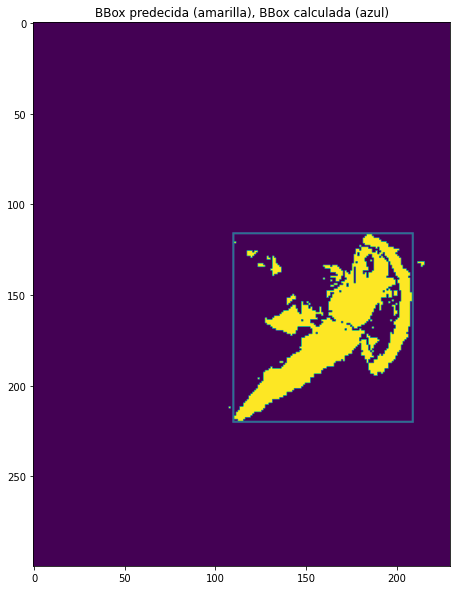

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(predBlob_seq1[4][100:400, 20:250])
plt.title("BBox predecida (amarilla), BBox calculada (azul)")
plt.show()

Podemos observar que al utilizar los coeficientes calculados, la bbox predecida es igual a la calculada según histogramas. 

Si probamos con coeficientes iguales a 1, notamos que si hay diferencia.

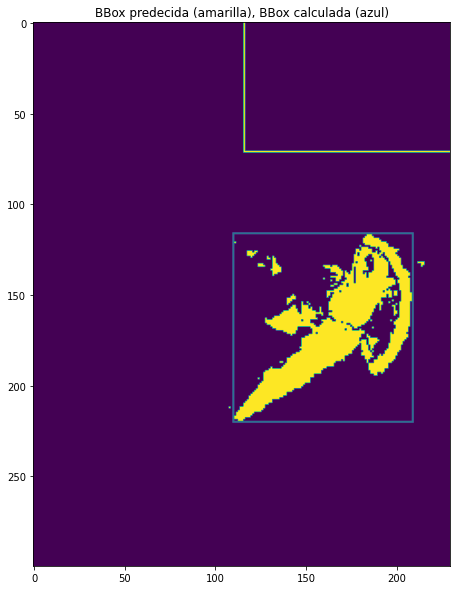

In [ ]:
predBlob_seq1_coef1 = draw_pred_box(seq_1, 1, 1, 1, 1)
plt.figure(figsize=(10,10))
plt.imshow(predBlob_seq1_coef1[4][100:400, 20:250])
plt.title("BBox predecida (amarilla), BBox calculada (azul)")
plt.show()

### **Secuencia 2**

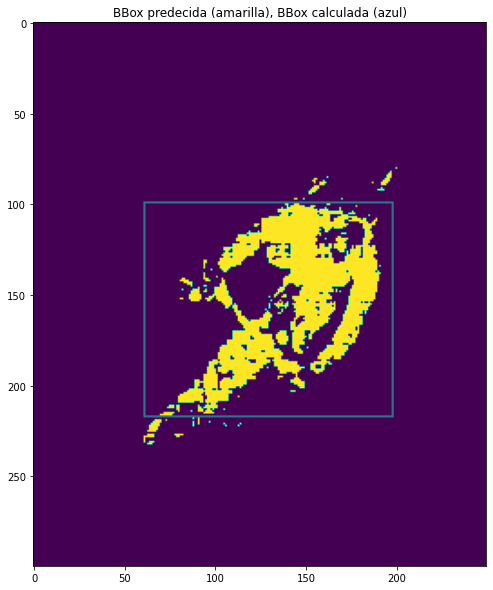

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(predBlob_seq2[4][350:650, 850:1100])
plt.title("BBox predecida (amarilla), BBox calculada (azul)")
plt.show()

Al igual que en el caso anterior, la bbox predecida es igual a ala calculada.

La siguiente figura muestra los resultados de coeficientes iguales a 1:

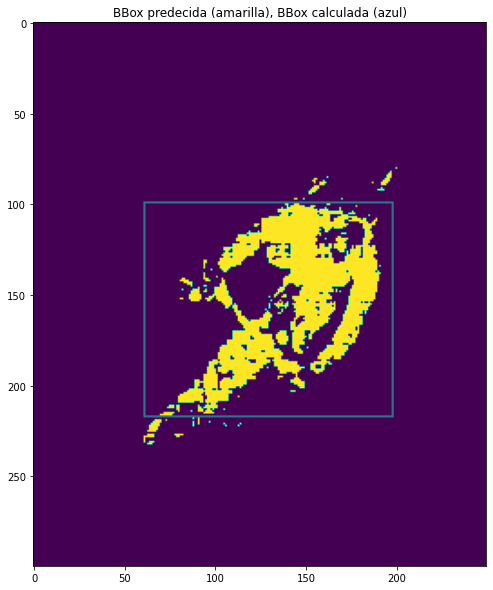

In [ ]:
predBlob_seq2_coef1 = draw_pred_box(seq_2, 1, 1, 1, 1)
plt.figure(figsize=(10,10))
plt.imshow(predBlob_seq2_coef1[4][350:650, 850:1100])
plt.title("BBox predecida (amarilla), BBox calculada (azul)")
plt.show()

A diferencia del caso del pájaro, como la persona que se desplaza en bicicleta es más uniforme que el vuelo del pájaro (visto desde arriba), la predicción es más correcta para coeficientes iguales a 1.

### **Secuencia 3**

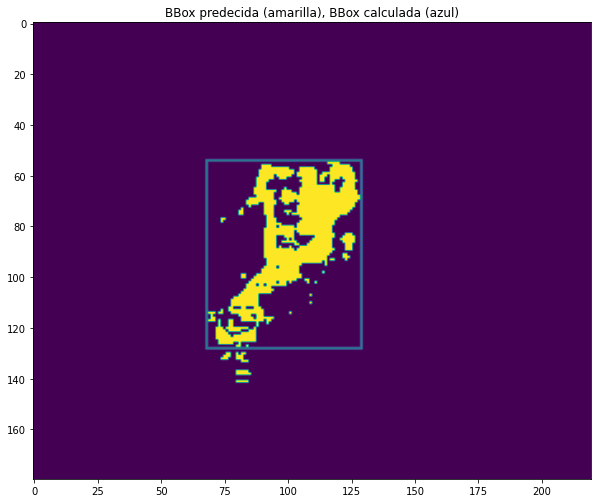

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(predBlob_seq3[4][120:300, 880:1100])
plt.title("BBox predecida (amarilla), BBox calculada (azul)")
plt.show()

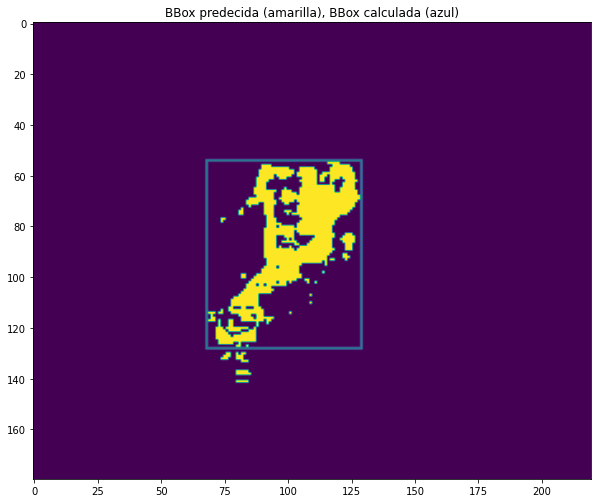

In [ ]:
predBlob_seq3_coef1 = draw_pred_box(seq_3, 1, 1, 1, 1)
plt.figure(figsize=(10,10))
plt.imshow(predBlob_seq3_coef1[4][120:300, 880:1100])
plt.title("BBox predecida (amarilla), BBox calculada (azul)")
plt.show()

En este caso, ocurre algo similar a la imagen de la secuencia 2 debido a que la imagen corresponde a una niña corriendo bajo la cámara. Podemos observar que la bounding box predecida es muy similar a la calculada, independiente de los coeficientes.

En los tres casos se puede observar que la caja estimada se aproxima de forma adecuada a la caja calculada usando la información del mismo fotograma, lo que indica que el método utilizado para predecir el movimiento del cuerpo permite obtener resultados que se adecuan correctamente al movimiento real. La precisión del tamaño de la caja predecida depende mucho de los fotogramas anteriores, por lo que puede variar, pero la dirección del movimiento en los tres casos fue correcta.

### Parte #5: Otras Secuencias

Se aplica el método de diferencias de cuadros a las secuencias 4, 5, 6 y 7.

En primer lugar se generan las secuencias:

In [ ]:
path_4 = "/content/seq4/*.bmp"
path_5 = "/content/seq5/*.bmp"
path_6 = "/content/seq6/*.bmp"
path_7 = "/content/seq7/*.jpg"

seq4_dif = get_image_diff(path_4, 80, 90)
seq5_dif = get_image_diff(path_5, 47, 57)
seq6_dif = get_image_diff(path_6, 13, 23)
seq7_dif = get_image_diff(path_7, 15, 25)

Luego para cada secuencia se plotea las matrices de diferencia obtenidas con la función programada en la parte 1 para fotogramas donde se detectó movimiento. Luego sobre los mismos fotogramas, se plotean las bboxes calculadas a partir de los histogramas de intensidades al igual que en la parte 2.

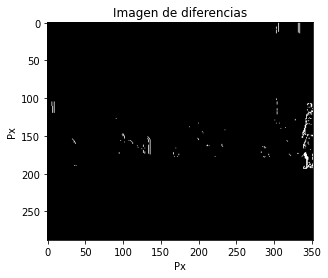

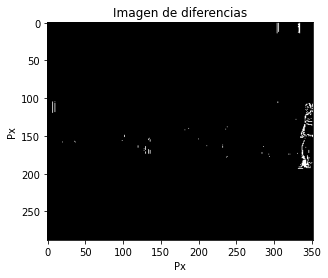

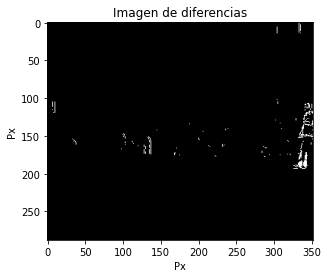

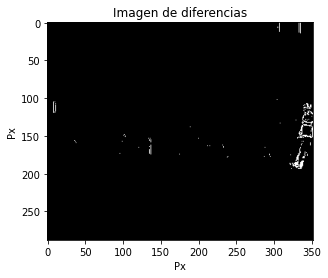

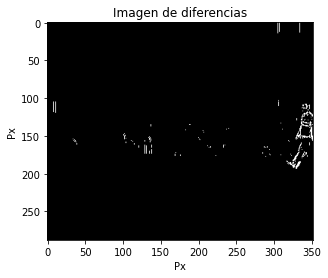

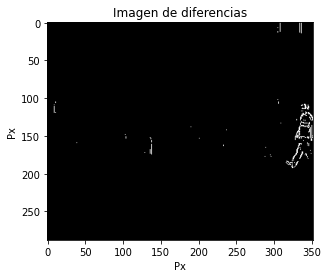

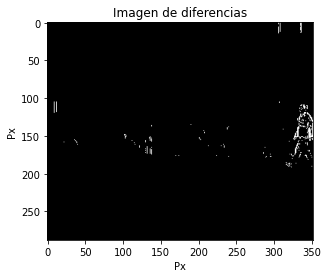

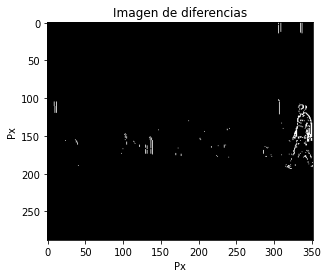

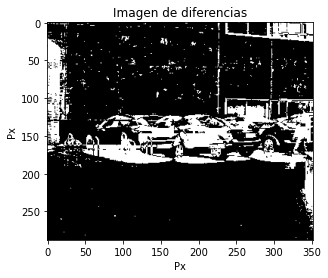

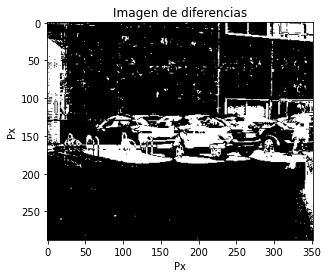

In [ ]:
bin_dif_4 = evaluate_difference(seq4_dif, 40)*255
for img in bin_dif_4:
    plt.imshow(img, cmap="gray")
    plt.xlabel("Px")
    plt.ylabel("Px")
    plt.title("Imagen de diferencias")
    plt.show()

En estos ejemplos se observa que una persona se desplaza desde la derecha hacia la izquierda.  Es por esto que al aplicar diferencia de cuadros, se resalta mucho el movimiento.
En general, se observa que los pixeles de primer plano destacan principalmente el movimiento de la persona, marcando mucho más el contorno de esta, denotando que ese es el cuerpo con un movimiento más considerable entre fotogramas, lo que queda de manifiesto aplicando el umbral correspondiente.
Calculamos los histogramas de intensidades para cada imagen y en base a esto obtenemos las bounding boxes para cada fotograma.

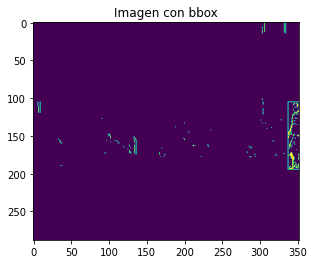

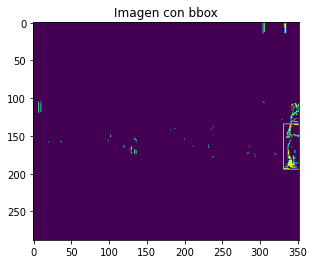

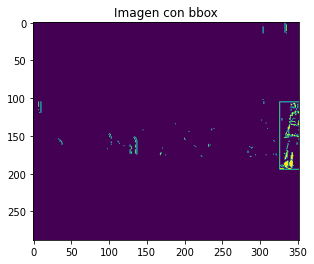

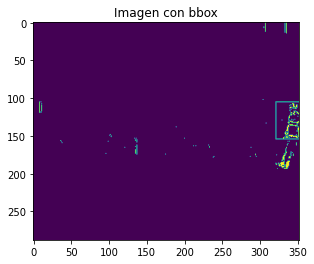

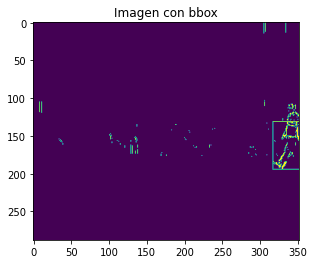

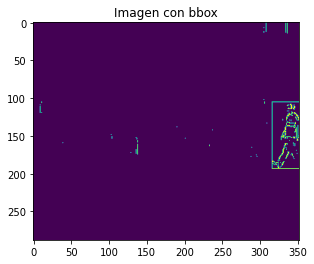

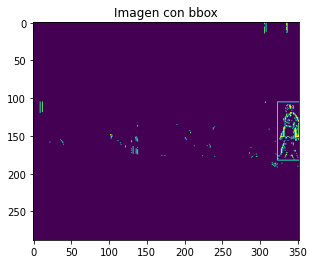

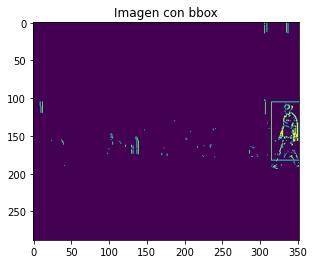

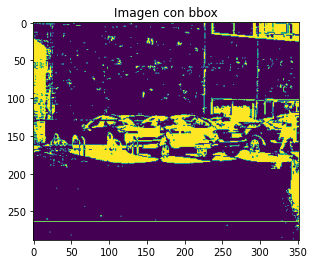

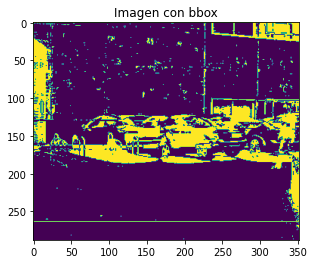

In [ ]:
seq_4_bbox = get_actual_blob(bin_dif_4)
for i in range(len(bin_dif_4)):
  img = bin_dif_4[i]
  img_w_box = drawBox(img, seq_4_bbox[i], 255, 1)
  plt.imshow(img_w_box)
  plt.title("Imagen con bbox")
  plt.show()

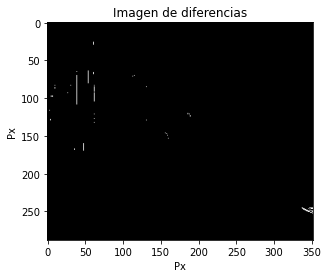

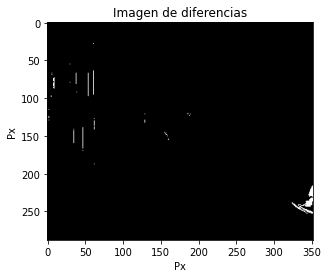

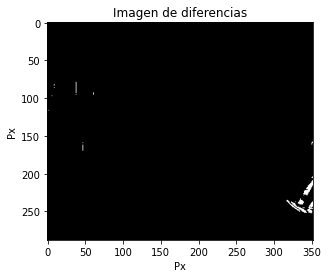

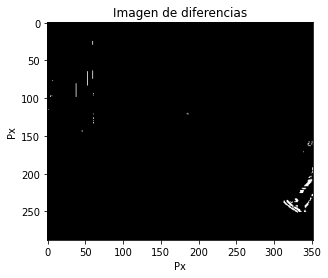

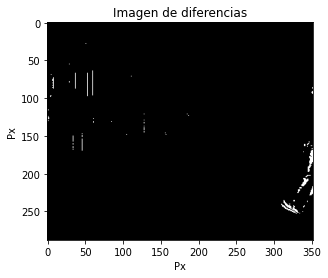

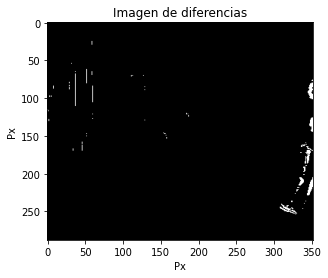

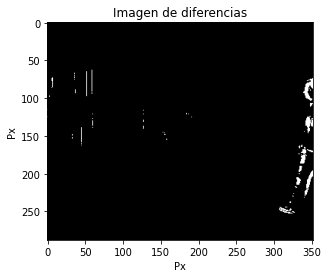

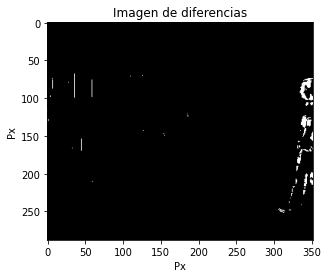

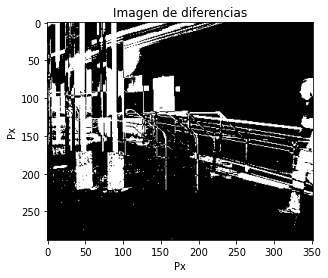

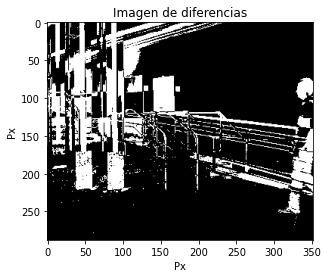

In [ ]:
bin_dif_5 = evaluate_difference(seq5_dif, 40)*255
for img in bin_dif_5:
    plt.imshow(img, cmap="gray")
    plt.xlabel("Px")
    plt.ylabel("Px")
    plt.title("Imagen de diferencias")
    plt.show()

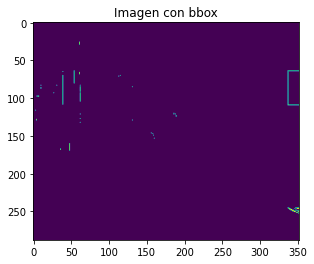

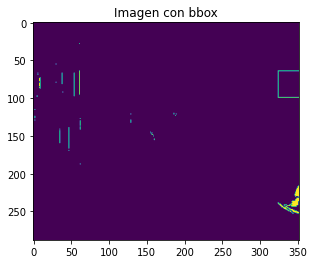

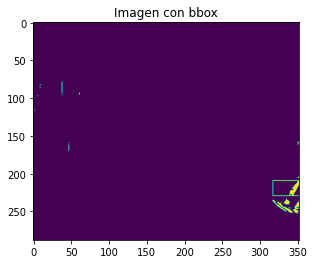

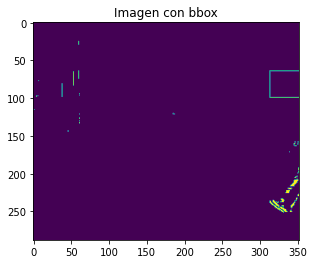

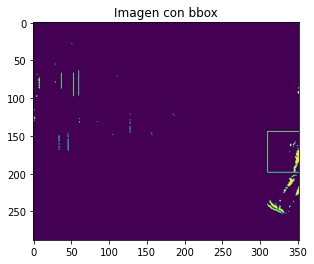

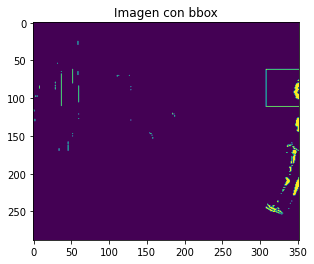

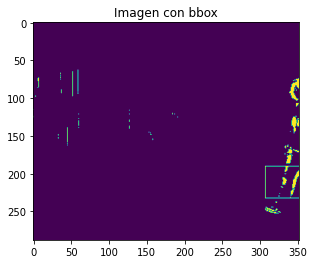

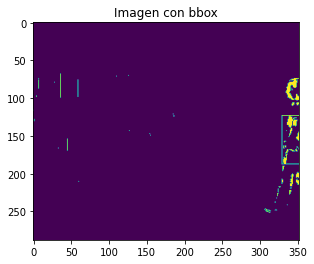

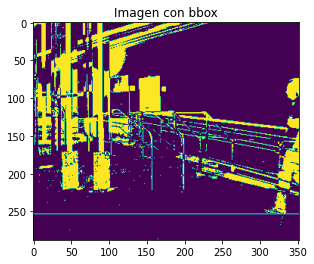

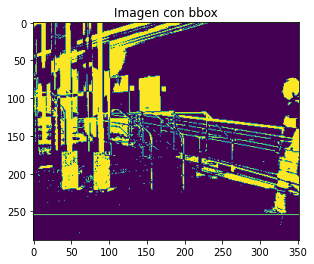

In [ ]:
seq_5_bbox = get_actual_blob(bin_dif_5)
for i in range(len(bin_dif_5)):
  img = bin_dif_5[i]
  img_w_box = drawBox(img, seq_5_bbox[i], 255, 1)
  plt.imshow(img_w_box)
  plt.title("Imagen con bbox")
  plt.show()

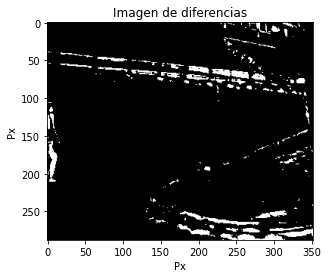

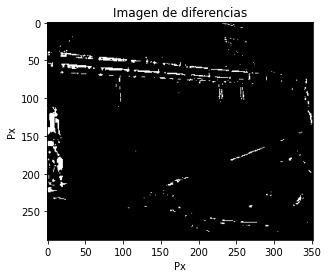

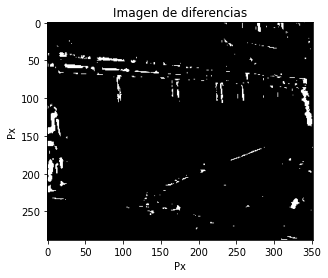

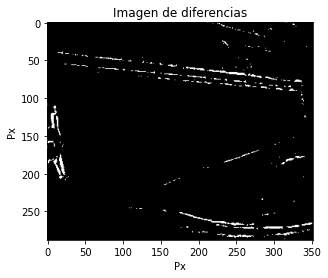

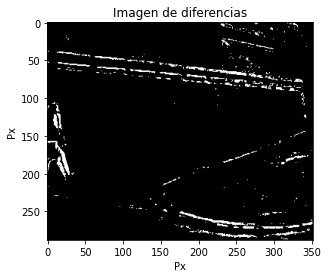

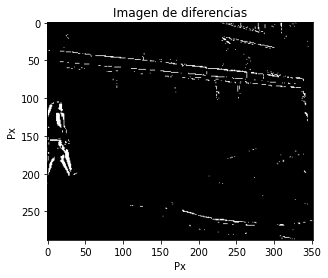

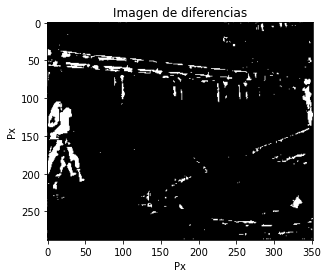

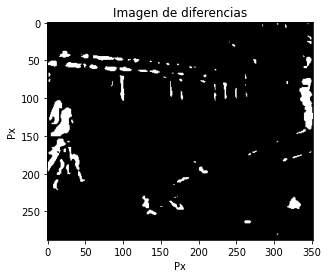

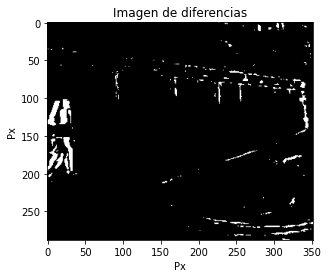

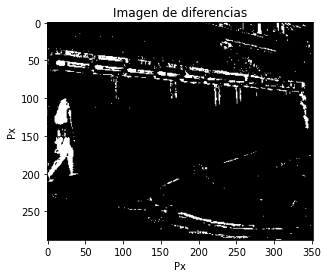

In [ ]:
bin_dif_6 = evaluate_difference(seq6_dif, 70)*255
for img in bin_dif_6:
    plt.imshow(img, cmap="gray")
    plt.xlabel("Px")
    plt.ylabel("Px")
    plt.title("Imagen de diferencias")
    plt.show()

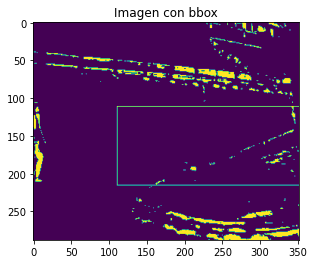

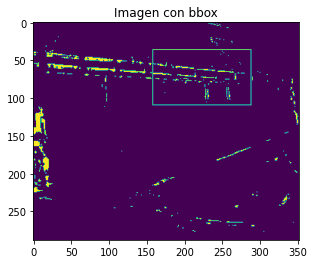

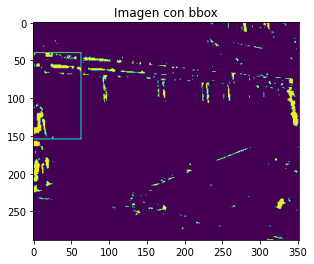

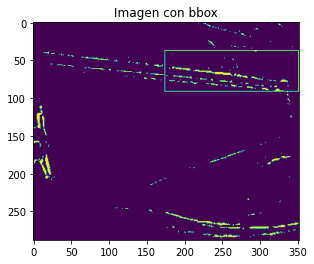

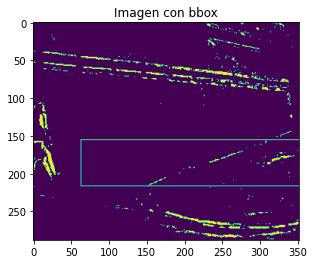

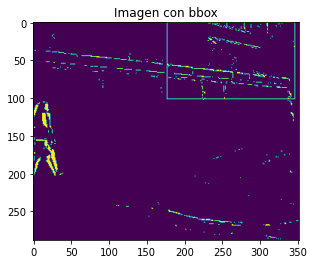

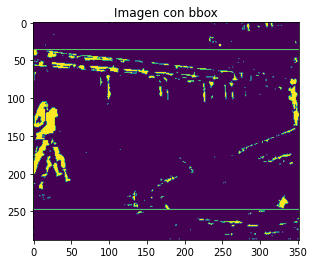

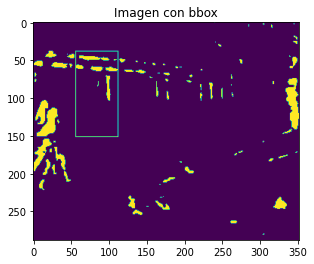

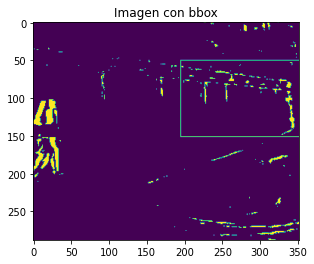

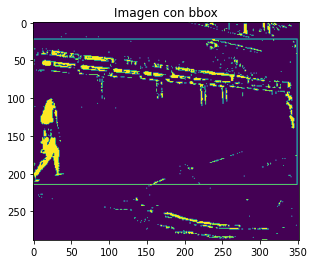

In [ ]:
seq_6_bbox = get_actual_blob(bin_dif_6)
for i in range(len(bin_dif_6)):
  img = bin_dif_6[i]
  img_w_box = drawBox(img, seq_6_bbox[i], 255, 1)
  plt.imshow(img_w_box)
  plt.title("Imagen con bbox")
  plt.show()

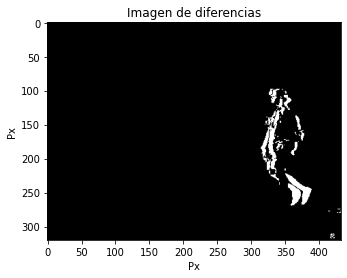

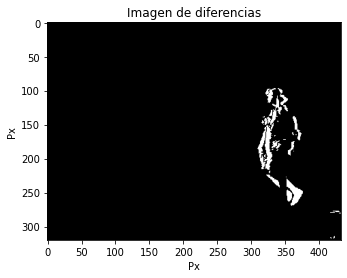

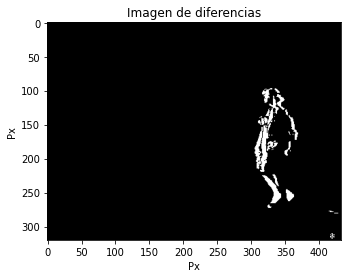

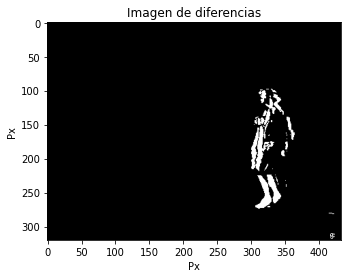

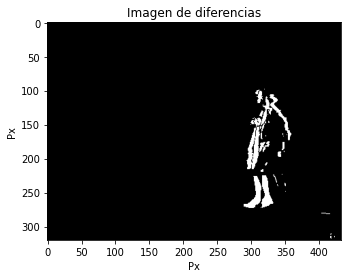

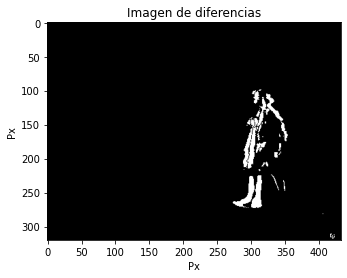

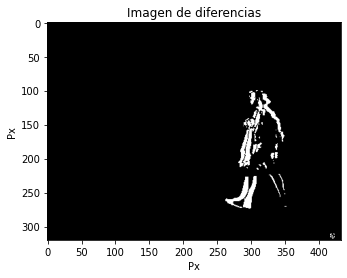

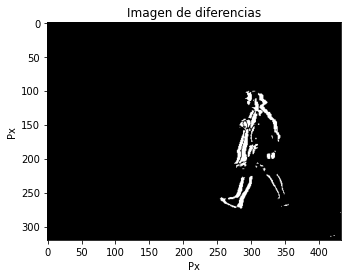

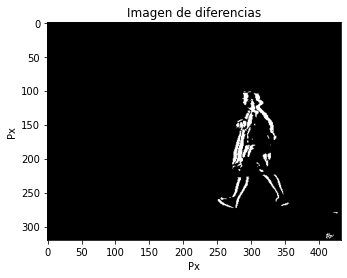

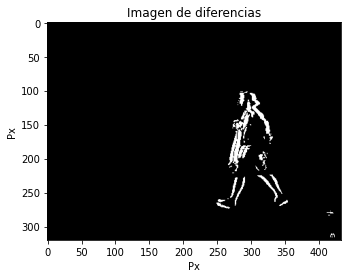

In [ ]:
bin_dif_7 = evaluate_difference(seq7_dif, 50)*255
for img in bin_dif_7:
    plt.imshow(img, cmap="gray")
    plt.xlabel("Px")
    plt.ylabel("Px")
    plt.title("Imagen de diferencias")
    plt.show()

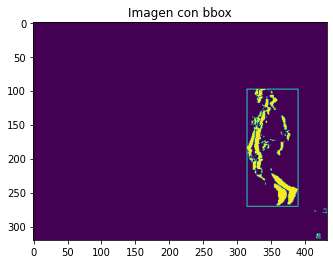

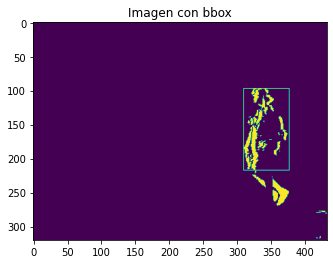

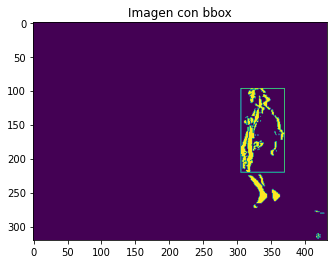

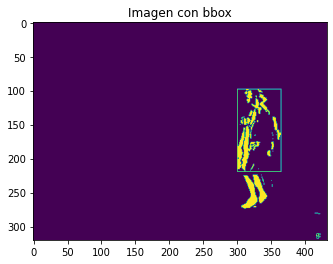

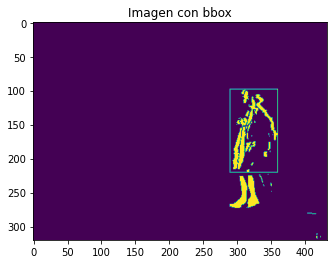

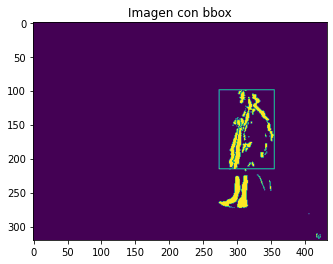

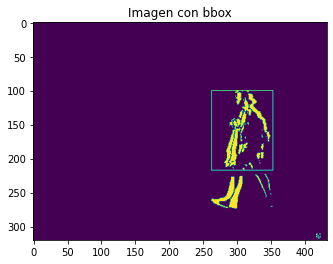

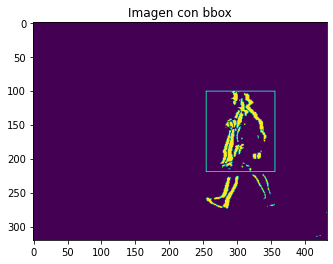

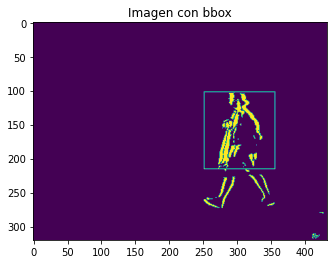

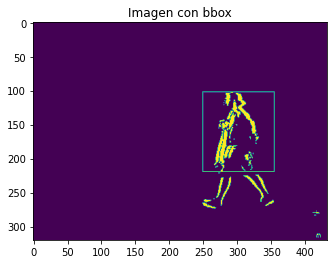

In [ ]:
seq_7_bbox = get_actual_blob(bin_dif_7)
for i in range(len(bin_dif_7)):
  img = bin_dif_7[i]
  img_w_box = drawBox(img, seq_7_bbox[i], 255, 1)
  plt.imshow(img_w_box)
  plt.title("Imagen con bbox")
  plt.show()

Podemos observar que para todas las secuencias se tuvo que definir un umbral diferente para calcular la matriz de diferencia. Este umbral depende de la cantidad de ruido de una imagen y en algunos casos, cuando la imagen es muy ruidosa, no permite diferenciar bien entre el movimiento de algo/alguien y el resto de la imagen (fondo).

Vemos que tanto para la secuencia 4, como 5 y 7, el método funciona bien de manera general: se detecta claramente el sector del movimiento pero no se logra encerrar con mucha precisión el cuerpo que se desplaza. 

Por otro lado, en la secuencia 6, como las imágenes son más ruidosas, no se logra distinguir con claridad el cuerpo que se mueve, por lo que las intensidades correspondientes a este no son muy bien reconocidas y diferenciadas por lo que la bbox no es muy precisa.

El principal problema de aplicar este método es que se hace necesario considerar un umbral para considerar qué pixeles son de movimiento y cuales no, lo que deja fuera ciertos movimientos más "suaves" o menos imperceptibles en la misma imagen.

Particularmente, en estas secuencias, la cámara se movía constantemente de derecha a izquerda, lo que no queda registrado al aplicar diferencia de cuadros, ya que al ser un movimiento menos perceptible, al aplicar el umbral, es considerado como un pixel de "segundo plano", mientras que el movimiento más perceptible, como el de la persona, queda categorizado como de "primer plano".

Con respecto a los resultados de las redes neuronales, lo primero que salta a la vista es que el tiempo en el que se demora en detectar los objetos es bastante menor al tiempo que se utiliza aca, aunque eso perfectamente puede ser por un tema de optimizacion de código. Lo otro que salta a la vista es que los cuadros realizados por la red neuronal tienden a abarcar al objeto completo mientras que los cuadros realizados por métodos de procesamiento y deteccion de imagenes enmarcan gran parte del objeto, las partes importantes por asi decirlo, sin embargo no enmarcan al objeto completo, dejando fuera algunas zonas de este que, dependiendo del caso, podría ser importante o no, otra cosa interesante es que la red neuronal convolucional es capaz de reconocer multiples objetos en una misma imagen con una precisión impresionante, mientras que con métodos de procesamiento de imágenes empiezan a haber problemas cuando hay ruido, tal como se pudo ver en los pasos anteriores. Un detalle importante a favor de las detecciones hechas con procesamiento de imagenes es que no se necesita entrenamiento ni una gran variedad de datos, solamente imagenes de una secuencia, a diferencia de las redes neuronales donde estas necesitan ser entrenadas en algun momento, aunque se use transfer learning, y en caso de haber una imagen muy fuera del rango de variedad que tiene la data de entrenamiento, la red tendra un mal resultado, mientras que con procesamiento de imagenes se podra lograr de igual  encerrar en un blob el objeto, al menos parcialmente.
